In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-alcohol-consumption.csv', index_col=0)
df.head(2)

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours


In [3]:
df.shape

(395, 29)

### Visialize relationship between the number of absences students have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

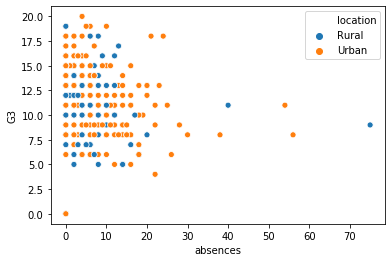

In [4]:
sns.scatterplot(x='absences', y='G3', data = df, hue = 'location', hue_order=['Rural', 'Urban'])

It looks like students with higher absenses tend to have lower grades in both rural and urban areas.

### How many students live in urban vs. rural areas, and does this vary based on what school the student attends?

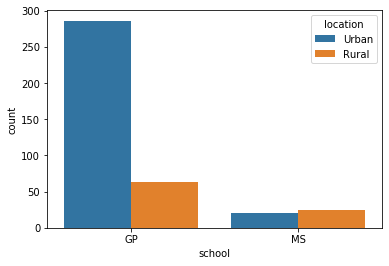

In [5]:
sns.countplot(x='school', data=df, hue='location')

tudents at GP tend to come from an urban location, but students at MS are more evenly split.